In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [77]:
df = pd.read_csv(r"realestatetransactions.csv")

In [4]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


#### Q1 With Hierarchical Indexing, rearrange the data to create a first dataframe which will have first level of index of city, second level of index of zip, please also rename index and column to make them more understandable, such as change zip to zipcode. Display the first eight rows of data. Do some plotting to reflect this new dataframe

In [5]:
df_q1 = df.set_index(['city','zip'])

df_q1.index.rename(['cityname','zipcode'],inplace=True)

# df_q1 = df_q1.head(8)
# df_q1

#### Try stack and unstack with the above created dataframe. Display the first eight rows of data.

In [6]:
df_q1

street state  beds  baths  sq__ft  \
cityname        zipcode                                                   
SACRAMENTO      95838           3526 HIGH ST    CA     2      1     836   
                95823            51 OMAHA CT    CA     3      1    1167   
                95815         2796 BRANCH ST    CA     2      1     796   
                95815       2805 JANETTE WAY    CA     2      1     852   
                95824        6001 MCMAHON DR    CA     2      1     797   
...                                      ...   ...   ...    ...     ...   
                95829     9169 GARLINGTON CT    CA     4      3    2280   
                95823        6932 RUSKUT WAY    CA     3      2    1477   
CITRUS HEIGHTS  95610      7933 DAFFODIL WAY    CA     3      2    1216   
ELK GROVE       95758       8304 RED FOX WAY    CA     4      2    1685   
EL DORADO HILLS 95762    3882 YELLOWSTONE LN    CA     3      2    1362   

                                type                     sale_date   price  \
cityname        zipcode                                                      
SACRAMENTO      95838    Residential  Wed May 21 00:00:00 EDT 2008   59222   
                95823    Residential  Wed May 21 00:00:00 EDT 2008   68212   
                95815    Residential  Wed May 21 00:00:00 EDT 2008   68880   
                95815    Residential  Wed May 21 00:00:00 EDT 2008   69307   
                95824    Residential  Wed May 21 00:00:00 EDT 2008   81900   
...                              ...                           ...     ...   
                95829    Residential  Thu May 15 00:00:00 EDT 2008  232425   
                95823    Residential  Thu May 15 00:00:00 EDT 2008  234000   
CITRUS HEIGHTS  95610    Residential  Thu May 15 00:00:00 EDT 2008  235000   
ELK GROVE       95758    Residential  Thu May 15 00:00:00 EDT 2008  235301   
EL DORADO HILLS 95762    Residential  Thu May 15 00:00:00 EDT 2008  235738   

                          latitude   longitude  
cityname        zipcode                         
SACRAMENTO      95838    38.631913 -121.434879  
                95823    38.478902 -121.431028  
                95815    38.618305 -121.443839  
                95815    38.616835 -121.439146  
                95824    38.519470 -121.435768  
...                            ...         ...  
                95829    38.457679 -121.359620  
                95823    38.499893 -121.458890  
CITRUS HEIGHTS  95610    38.708824 -121.256803  
ELK GROVE       95758    38.417000 -121.397424  
EL DORADO HILLS 95762    38.655245 -121.075915  

[985 rows x 10 columns]

#### Q2 With Hierarchical Indexing, rearrange the data to create a second dataframe which will have first level of index of city, second level of index of zip, columns of bed, bath and sale_date. Please also rename index and column to make them more understandable, such as change zip to zipcode. Display the first eight rows of data

In [7]:
df_q2 = df[['city','zip','beds','baths','sale_date']].set_index(['city','zip'])
df_q2.index.rename(['cityname','zipcode'],inplace=True)
df_q2.head(8)

beds  baths                     sale_date
cityname   zipcode                                           
SACRAMENTO 95838       2      1  Wed May 21 00:00:00 EDT 2008
           95823       3      1  Wed May 21 00:00:00 EDT 2008
           95815       2      1  Wed May 21 00:00:00 EDT 2008
           95815       2      1  Wed May 21 00:00:00 EDT 2008
           95824       2      1  Wed May 21 00:00:00 EDT 2008
           95841       3      1  Wed May 21 00:00:00 EDT 2008
           95842       3      2  Wed May 21 00:00:00 EDT 2008
           95820       3      1  Wed May 21 00:00:00 EDT 2008

# credit-data-non-null.csv

In [79]:
df = pd.read_csv(r"credit-data-non-null.csv")

In [9]:
df.columns

Index(['serious_dlqin2yrs', 'revolving_utilization_of_unsecured_lines', 'age',
       'number_of_time30-59_days_past_due_not_worse', 'debt_ratio',
       'monthly_income', 'number_of_open_credit_lines_and_loans',
       'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
       'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'],
      dtype='object')

##### Write a custom function called cap_value(x, cap) that will set x to the cap if x > cap. Then apply it to debt_ratio with a cap of 5

In [11]:
def cap_value(x,cap=5):
    if x>cap:
        return cap
    else:
        return x

In [12]:
df['debt_ratio'] = df['debt_ratio'].apply(lambda x:cap_value(x))

#### Use groupby to calculate the percent of customers that went bad for each age

* Here Randomly assigining "GOOD" or "BAD".
* If Any condition to classify record as GOOD or BAD then implement that.

In [82]:
import random
choices = ['GOOD','BAD']
df['Good_Bad']=''

for i in set(df.age):
#     print(i)
#     print(len([random.cho/ice(['Good','Bad']) for _ in range((df[df.age==i].shape[0]))]))
    df.loc[df.age==i,'Good_Bad'] = [random.choice(choices) for _ in range((df[df.age==i].shape[0]))]

In [85]:
df[['age','Good_Bad']].head(5)

,age,Good_Bad
0,45,GOOD
1,40,BAD
2,38,GOOD
3,30,GOOD
4,49,BAD


In [93]:
agg_df = df.groupby(['age','Good_Bad']).agg({"Good_Bad":"count"})
agg_df = agg_df/agg_df.groupby(level=0).sum()
agg_df.head()

Good_Bad
age Good_Bad          
0   BAD       1.000000
21  BAD       0.519126
    GOOD      0.480874
22  BAD       0.486175
    GOOD      0.513825

#### Add a new column age_group for the dataframe. Divide the age into groups of every 10 years in ascending order, then rearrange the data to match the age_group categorization.

* To see the distribution of age to derive the Bins.
* Observation is that max age is 110 and min age is 10 so, we can start binning from 10 to 100 for each 10

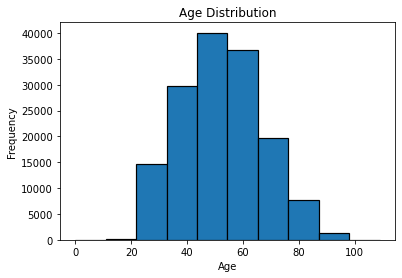

In [150]:
df.age.hist(edgecolor='black',linewidth=1.2)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
# plt.axis('off')
plt.grid(b=None)
plt.show()

In [95]:
df['age_group'] = pd.cut(x=df['age'], bins=list(range(20,120,10)))

df['age_group_formatted'] = df['age_group'].apply(lambda x:str(x.left) +"-"+ str(x.right))

df[['age','age_group','age_group_formatted']].head(8)

,age,age_group,age_group_formatted
0,45,"(40, 50]",40-50
1,40,"(30, 40]",30-40
2,38,"(30, 40]",30-40
3,30,"(20, 30]",20-30
4,49,"(40, 50]",40-50
5,74,"(70, 80]",70-80
6,39,"(30, 40]",30-40
7,57,"(50, 60]",50-60


#### Do some plotting to reflect it. Use age_group for data aggregation on revolving_utilization_of_unsecured_lines and monthly_income

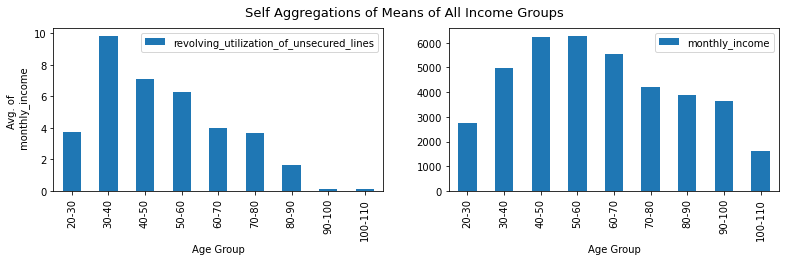

In [137]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

fig,ax = plt.subplots(1,2,figsize=(13,3))
fig.suptitle('Self Aggregations of Means of All Income Groups',fontsize=13)

df.groupby('age_group_formatted').agg({'revolving_utilization_of_unsecured_lines':'mean'}).plot(kind='bar',ax=ax[0])
df.groupby('age_group_formatted').agg({'monthly_income':'mean'}).plot(kind='bar',ax=ax[1])

ax[0].set_ylabel("Avg. of \n revolving_utilization_of_unsecured_lines")
ax[0].set_ylabel("Avg. of \n monthly_income")
for i in [0,1]:
    ax[i].set_xlabel("Age Group")

plt.show()

#### Regroup data using number_real_estate_loans_or_lines and serious_dlqin2yrs, display the first eight rows of data and do some plotting to reflect this it. Then do count, mean, max, min on revolving_utilization_of_unsecured_lines and monthly_income. Display the result. Then select the top five monthly_income values by group and display it.

['count', 'mean', 'max', 'min']

In [27]:
agg_types = ['mean','count','min','max']

In [ ]:
# plt.figure(figsize=(30,5))

col1 = 'monthly_income'
col2 = 'revolving_utilization_of_unsecured_lines'

agg_cols = ['number_real_estate_loans_or_lines','serious_dlqin2yrs']
# agg_type = agg_types[0]

## 1.Averages of `Income` and `revolving_utilization_of_unsecured_lines` each Combination 

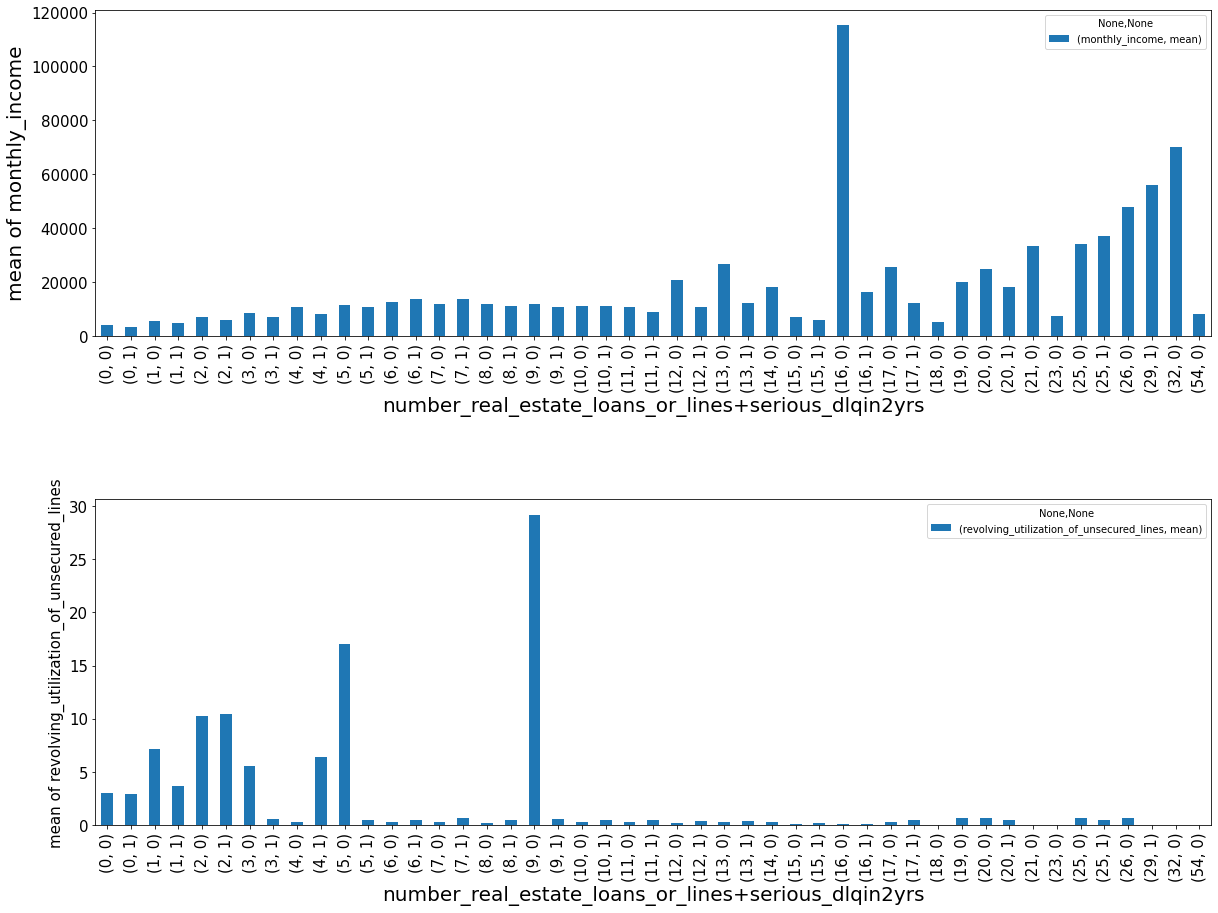

In [42]:
fig, axes = plt.subplots(2, 1,figsize=(20,15))#figsize=(25,25), gridspec_kw={'height_ratios': [2, 3]}
df.groupby(agg_cols).agg({col1:[agg_types[0]]}).plot.bar(ax=axes[0])

axes

axes[0].set_xlabel("+".join(agg_cols),fontsize=20)
axes[0].set_ylabel(f"{agg_types[0]} of {col1}",fontsize=20)

df.groupby(agg_cols).agg({col2:[agg_types[0]]}).plot.bar(ax=axes[1])


axes[1].set_xlabel("+".join(agg_cols),fontsize=20)
axes[1].set_ylabel(f"{agg_types[0]} of {col2}",fontsize=15)


plt.subplots_adjust(wspace=0, hspace=0.5) 
plt.show()

## 2. Counts of `Income` and `revolving_utilization_of_unsecured_lines` each Combination 

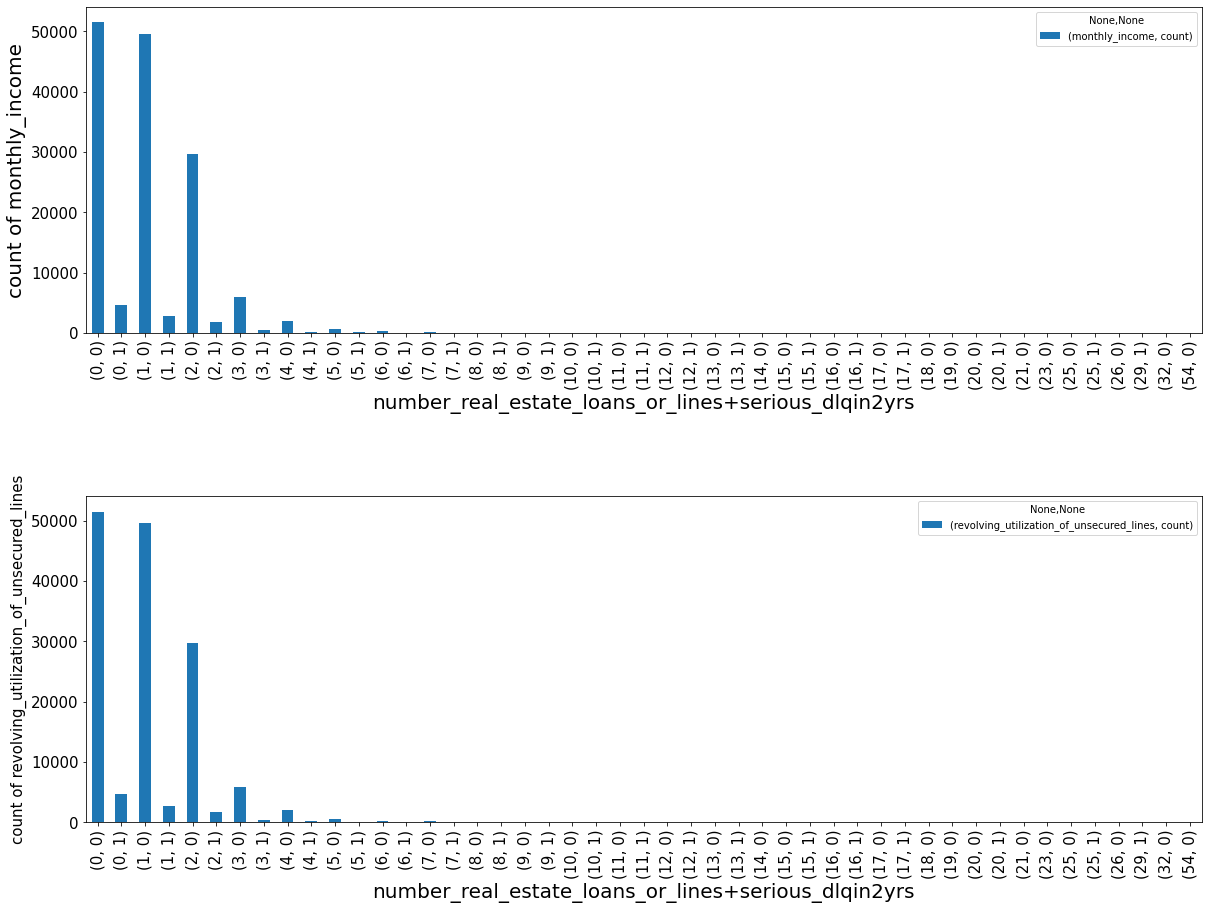

In [35]:
fig, axes = plt.subplots(2, 1,figsize=(20,15))#figsize=(25,25), gridspec_kw={'height_ratios': [2, 3]}
df.groupby(agg_cols).agg({col1:[agg_types[1]]}).plot.bar(ax=axes[0])

axes[0].set_xlabel("+".join(agg_cols),fontsize=20)
axes[0].set_ylabel(f"{agg_types[1]} of {col1}",fontsize=20)

df.groupby(agg_cols).agg({col2:[agg_types[1]]}).plot.bar(ax=axes[1])


axes[1].set_xlabel("+".join(agg_cols),fontsize=20)
axes[1].set_ylabel(f"{agg_types[1]} of {col2}",fontsize=15)

plt.subplots_adjust(wspace=0, hspace=0.5) 
plt.show()

## Minimums of `Income` and `revolving_utilization_of_unsecured_lines` each Combination 

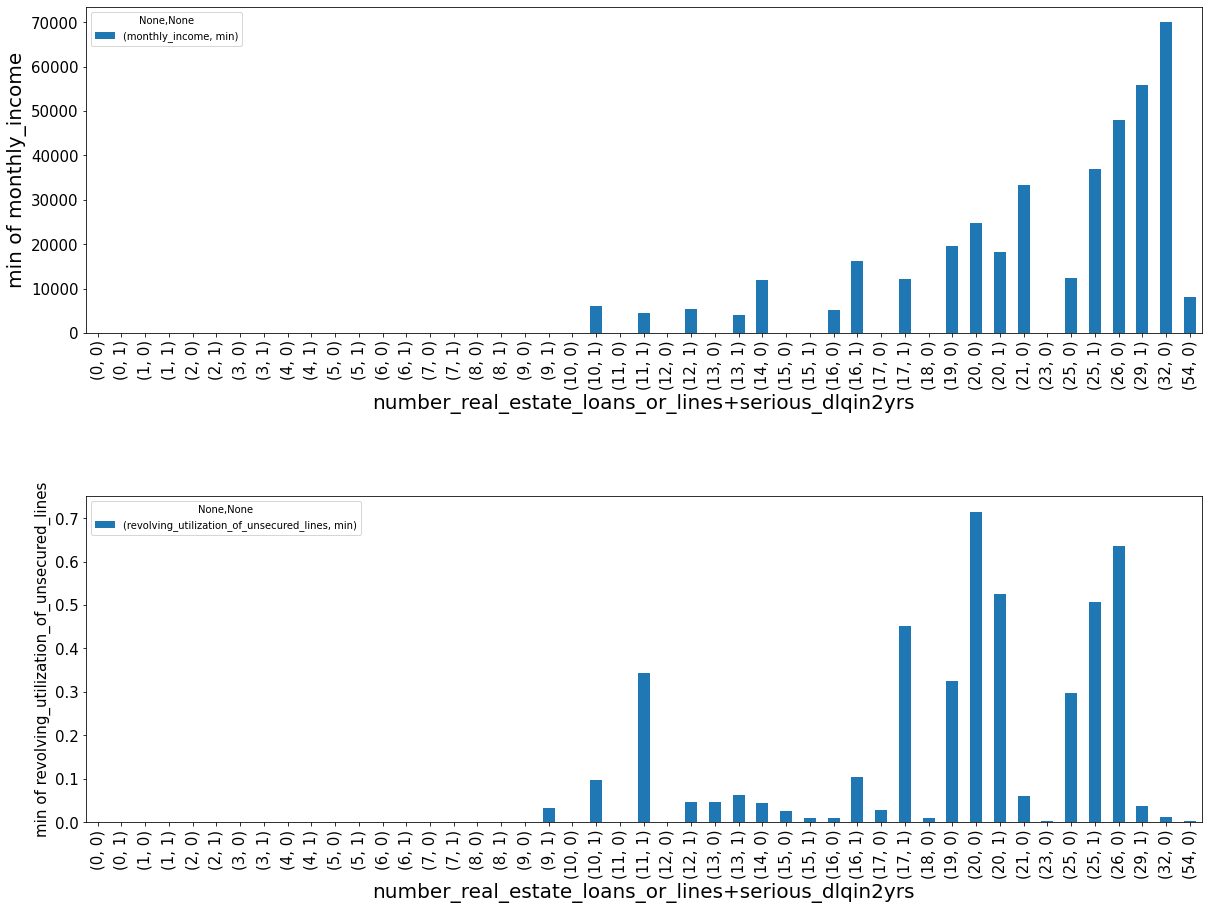

In [36]:
fig, axes = plt.subplots(2, 1,figsize=(20,15))#figsize=(25,25), gridspec_kw={'height_ratios': [2, 3]}
df.groupby(agg_cols).agg({col1:[agg_types[2]]}).plot.bar(ax=axes[0])

axes[0].set_xlabel("+".join(agg_cols),fontsize=20)
axes[0].set_ylabel(f"{agg_types[2]} of {col1}",fontsize=20)

df.groupby(agg_cols).agg({col2:[agg_types[2]]}).plot.bar(ax=axes[1])


axes[1].set_xlabel("+".join(agg_cols),fontsize=20)
axes[1].set_ylabel(f"{agg_types[2]} of {col2}",fontsize=15)

plt.subplots_adjust(wspace=0, hspace=0.5) 
plt.show()

## Maximums of `Income` and `revolving_utilization_of_unsecured_lines` each Combination 

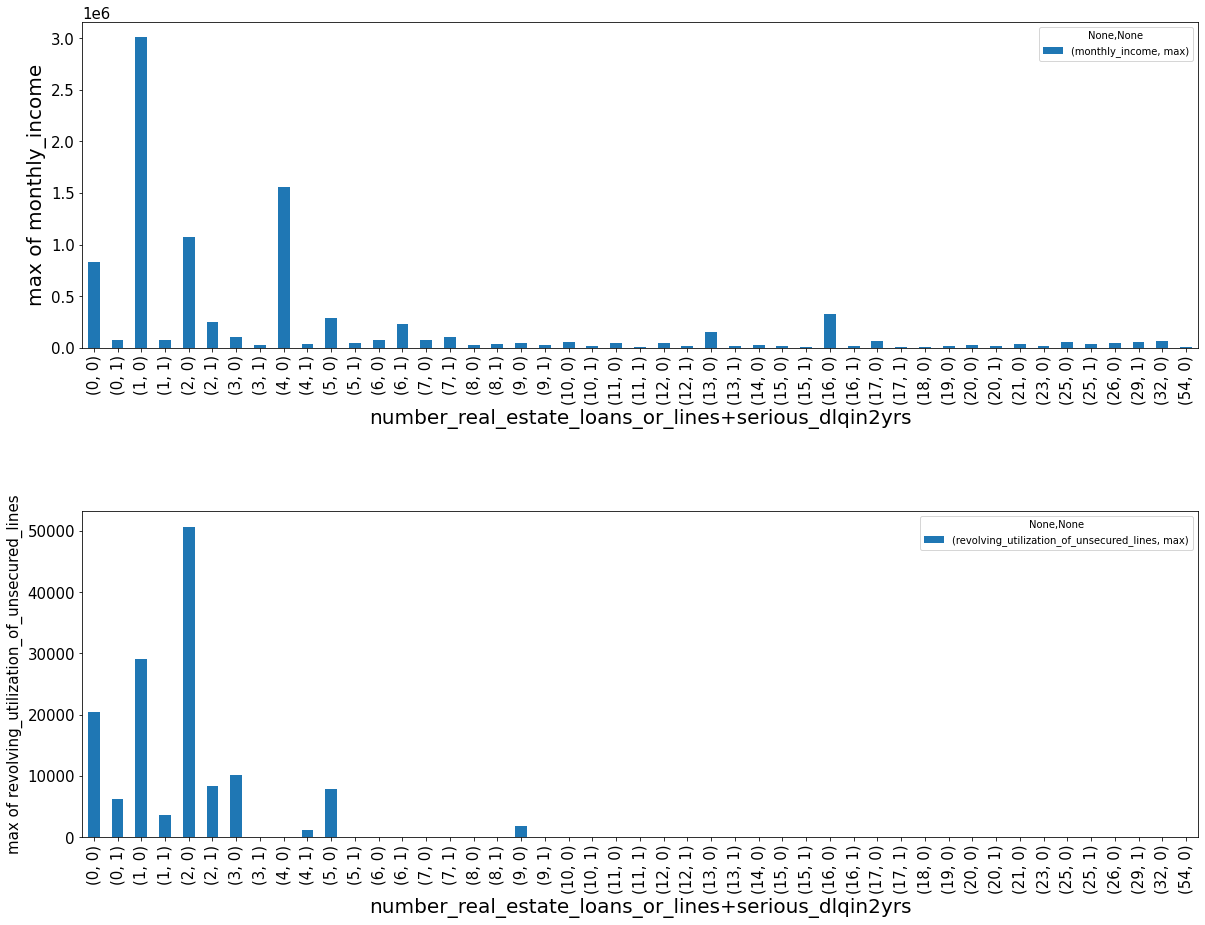

In [38]:
fig, axes = plt.subplots(2, 1,figsize=(20,15))#figsize=(25,25), gridspec_kw={'height_ratios': [2, 3]}
df.groupby(agg_cols).agg({col1:[agg_types[3]]}).plot.bar(ax=axes[0])

axes[0].set_xlabel("+".join(agg_cols),fontsize=20)
axes[0].set_ylabel(f"{agg_types[3]} of {col1}",fontsize=20)

df.groupby(agg_cols).agg({col2:[agg_types[3]]}).plot.bar(ax=axes[1])


axes[1].set_xlabel("+".join(agg_cols),fontsize=20)
axes[1].set_ylabel(f"{agg_types[3]} of {col2}",fontsize=15)

plt.subplots_adjust(wspace=0, hspace=0.5) 
plt.show()

### Top 5 Incomes

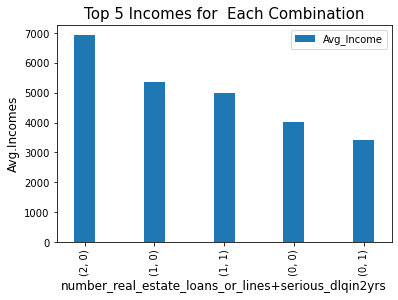

In [152]:
# plt.figure(figsize=(25,50))
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 


cols = ["number_real_estate_loans_or_lines","serious_dlqin2yrs","Avg_Income"]
mean_incomes = df.groupby(agg_cols).agg({col1:[agg_types[0]]}).reset_index().head(5)
mean_incomes.columns = cols
mean_incomes  = mean_incomes.sort_values(['Avg_Income'],ascending=False)
mean_incomes.set_index(cols[:2]).plot.bar(width=0.3)
plt.xlabel("+".join(agg_cols),size=12)
plt.ylabel("Avg.Incomes",size=12)
plt.title("Top 5 Incomes for  Each Combination",size=15)
plt.show()